In [1]:


import itertools
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [2]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv


--2022-02-07 09:53:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.08s   

2022-02-07 09:53:07 (300 KB/s) - ‘loan_train.csv’ saved [23101/23101]



# Load Data From CSV File


In [4]:
df = pd.read_csv('loan_train.csv')
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
#keep the categorical variable in a list
ycat = df['loan_status'].values
ycat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [6]:
df.describe()


,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


# Convert to date time object


In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


In [8]:
import seaborn as sns


In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y


Solving environment: done

# All requested packages already installed.



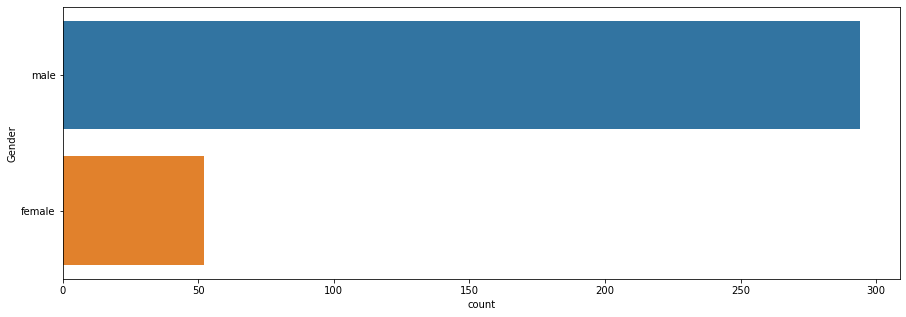

In [10]:
# Male are more likely to contract a loan
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

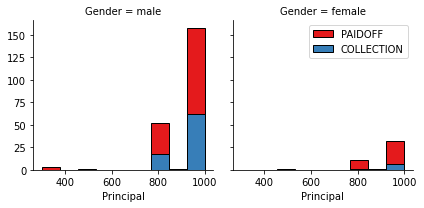

In [11]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

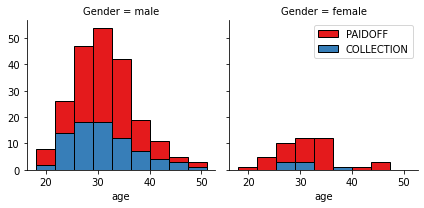

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


# Pre-processing: Feature selection/extraction

Let's look at the day of the week people get the loan

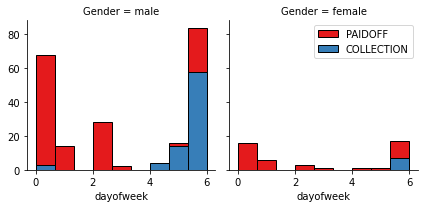

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


# Convert Categorical features to numerical values

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [16]:
######   EFFACER !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
#df.head()


In [17]:
# convert loan_status to a numerical variable
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
df['loan_status'] = df['loan_status'].astype('int')

df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


# One Hot Encoding

In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

Features before One Hot Encoding

In [19]:
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,male,High School or Below
1,1000,30,33,female,Bechalor
2,1000,15,27,male,college
3,1000,30,28,female,college
4,1000,30,29,male,college


Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [20]:
Feature = df[['terms','age','weekend','Principal']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['Gender'])], axis=1)

Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,terms,age,weekend,Principal,Bechalor,High School or Below,college,female,male
0,30,45,0,1000,0,1,0,0,1
1,30,33,0,1000,1,0,0,1,0
2,15,27,0,1000,0,0,1,0,1
3,30,28,1,1000,0,0,1,1,0
4,30,29,1,1000,0,0,1,0,1


# Feature Selection


Let's define feature sets, X:



In [21]:
X = Feature
X[0:5]


,terms,age,weekend,Principal,Bechalor,High School or Below,college,female,male
0,30,45,0,1000,0,1,0,0,1
1,30,33,0,1000,1,0,0,1,0
2,15,27,0,1000,0,0,1,0,1
3,30,28,1,1000,0,0,1,1,0
4,30,29,1,1000,0,0,1,0,1


In [22]:
y = df['loan_status'].values
y[0:5]


array([1, 1, 1, 1, 1])

# Normalize Data

In [23]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[ 0.92071769,  2.33152555, -1.20577805,  0.51578458, -0.38170062,
         1.13639374, -0.86968108, -0.42056004,  0.42056004],
       [ 0.92071769,  0.34170148, -1.20577805,  0.51578458,  2.61985426,
        -0.87997669, -0.86968108,  2.37778177, -2.37778177],
       [-0.95911111, -0.65321055, -1.20577805,  0.51578458, -0.38170062,
        -0.87997669,  1.14984679, -0.42056004,  0.42056004],
       [ 0.92071769, -0.48739188,  0.82934003,  0.51578458, -0.38170062,
        -0.87997669,  1.14984679,  2.37778177, -2.37778177],
       [ 0.92071769, -0.3215732 ,  0.82934003,  0.51578458, -0.38170062,
        -0.87997669,  1.14984679, -0.42056004,  0.42056004]])

# Classification

# K Nearest Neighbor(KNN)


In [24]:
pip install delayed

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score 
from sklearn.metrics import f1_score


In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [27]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)


[0.64285714 0.58571429 0.74285714 0.7        0.74285714 0.71428571
 0.8        0.75714286 0.74285714]


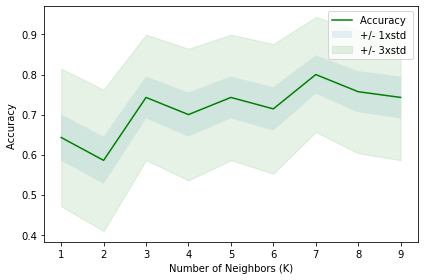

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [29]:
k = 7

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn = neigh.predict(X_test)
yhat[0:5]


array([1, 1, 1, 1, 1])

[[ 8  7]
 [ 7 48]]


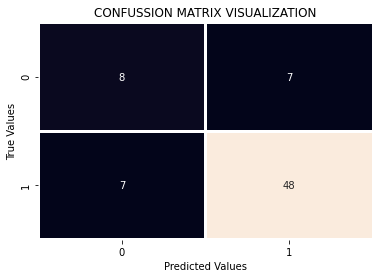

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,yhat_knn,labels=[0,1]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,yhat_knn),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()


In [31]:

##Accuracy_score, f1 score, jaccard similarity
#print(accuracy_score(y_test, yhat_knn))
#print(f1_score(y_test, yhat_knn, average='weighted'))
#print(jaccard_score(y_test, yhat_knn))


In [32]:


#print(classification_report(y_test,yhat_knn))


# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier


In [34]:
X_train, X_test, ycat_train, ycat_test = train_test_split( X, ycat, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  ycat_train.shape)
print ('Test set:', X_test.shape,  ycat_test.shape)


Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [35]:
# Looking for the max_depth

k=10
mean_dec = np.zeros((k-1))

for n in range(1,k):
    #Train Model and Predict 
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    # fit the model
    loanTree.fit(X_train,ycat_train)
    #Prediction
    yhat_dt=loanTree.predict(X_test)
    mean_dec[n-1] = np.mean(yhat_dt==ycat_test)
    #checks if all the values in y_test is equal to corresponding values in y_pred which either results in 0 or 1. 
    #And then takes the mean of it (which is still 0 or 1).
    acc_tree= accuracy_score(ycat_test, yhat_dt)
    print(acc_tree)


print(mean_dec)


0.6714285714285714
0.6714285714285714
0.6714285714285714
0.5857142857142857
0.6142857142857143
0.5571428571428572
0.5714285714285714
0.5857142857142857
0.6
[0.67142857 0.67142857 0.67142857 0.58571429 0.61428571 0.55714286
 0.57142857 0.58571429 0.6       ]


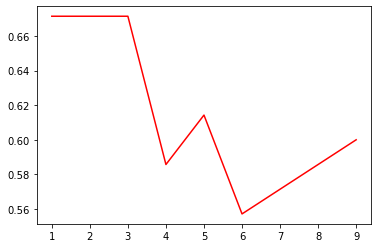

In [36]:
plt.plot(range(1,k),mean_dec,'r')


In [37]:
#Train Model and Predict  
loanTree_2 = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
loanTree_2.fit(X_train,ycat_train)
yhat2_dt=loanTree_2.predict(X_test)

yhat2_dt[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

[Text(0.4444444444444444, 0.875, 'X[2] <= -0.188\nentropy = 0.775\nsamples = 276\nvalue = [63, 213]'),
 Text(0.2222222222222222, 0.625, 'X[6] <= 0.14\nentropy = 0.125\nsamples = 117\nvalue = [2, 115]'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(0.3333333333333333, 0.375, 'X[1] <= 1.254\nentropy = 0.258\nsamples = 46\nvalue = [2, 44]'),
 Text(0.2222222222222222, 0.125, 'entropy = 0.165\nsamples = 41\nvalue = [1, 40]'),
 Text(0.4444444444444444, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.625, 'X[0] <= -1.46\nentropy = 0.961\nsamples = 159\nvalue = [61, 98]'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7777777777777778, 0.375, 'X[6] <= 0.14\nentropy = 0.972\nsamples = 152\nvalue = [61, 91]'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.997\nsamples = 83\nvalue = [39, 44]'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.903\nsamples = 69\nvalue = [22, 47]')]

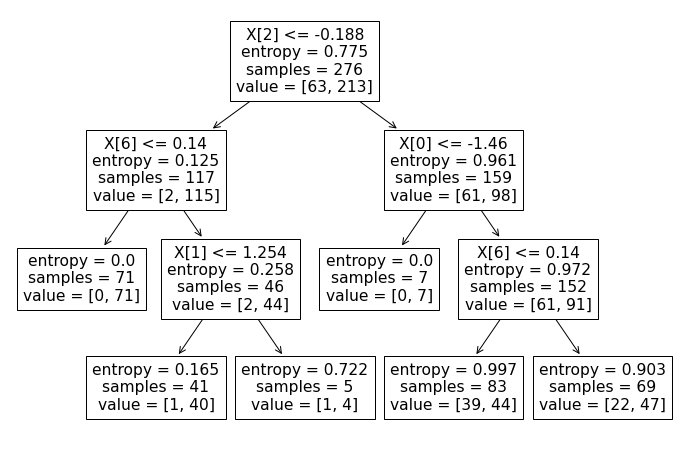

In [38]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(loanTree_2.fit(X_train, ycat_train)) 


[[47  0]
 [23  0]]


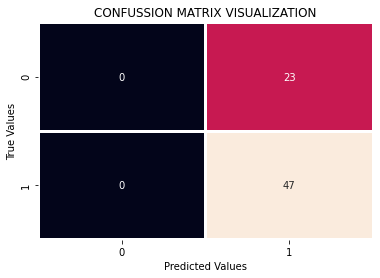

In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ycat_test,yhat2_dt,labels=['PAIDOFF','COLLECTION']))
import seaborn as sns          
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(ycat_test,yhat2_dt),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()


# Support Vector Machine

In [40]:
from sklearn import svm


In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#with rbf function

#Train and predict
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
yhat_rbf = clf_rbf.predict(X_test)


Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [42]:
#with linear function
#Train and predict
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X_train, y_train)
yhat_lin = clf_lin.predict(X_test)


In [43]:
#Accuracy_score, f1 score, jaccard similarity
#print(accuracy_score(y_test, yhat_lin))
#print(f1_score(y_test, yhat_lin, average='weighted'))
#print(jaccard_score(y_test, yhat_lin))


In [44]:
#with polynomial function
#Train and predict
clf_pol = svm.SVC(kernel='poly')
clf_pol.fit(X_train, y_train)
yhat_pol = clf_pol.predict(X_test)


In [45]:
#Accuracy_score, f1 score, jaccard similarity
print(accuracy_score(y_test, yhat_pol))
print(f1_score(y_test, yhat_pol, average='weighted'))
print(jaccard_score(y_test, yhat_pol))


0.7571428571428571
0.6978810663021189
0.7536231884057971


In [46]:
#with sigmoid function
#Train and predict
clf_sig = svm.SVC(kernel='sigmoid')
clf_sig.fit(X_train, y_train)
yhat_sig = clf_sig.predict(X_test)


In [47]:
#Accuracy_score, f1 score, jaccard similarity
print(accuracy_score(y_test, yhat_sig))
print(f1_score(y_test, yhat_sig, average='weighted'))
print(jaccard_score(y_test, yhat_sig))


0.7142857142857143
0.685960591133005
0.7058823529411765


[[ 3 12]
 [ 6 49]]


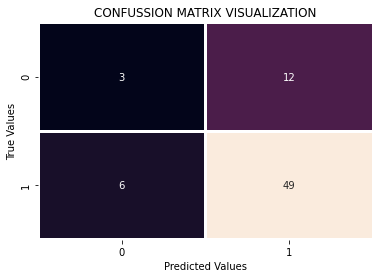

In [48]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,yhat_rbf,labels=[0,1]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,yhat_rbf),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()


# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression


In [50]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)
yhat_LR_prob = LR.predict_proba(X_test)


In [51]:

#Accuracy_score, f1 score, jaccard similarity
#print(accuracy_score(y_test, yhat_LR))
#print(f1_score(y_test, yhat_LR, average='weighted'))
#print(jaccard_score(y_test, yhat_LR))


[[ 2 13]
 [ 9 46]]


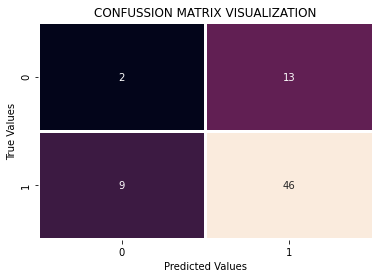

In [52]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,yhat_LR,labels=[0,1]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,yhat_LR),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()


# Model Evaluation using Test set

In [53]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [54]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv


--2022-02-07 09:54:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-02-07 09:54:20 (27.3 MB/s) - ‘loan_test.csv’ saved [3642/3642]



Load Test set for evaluation


In [55]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [56]:
# Pre-processing loan_test
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)





Feature_test = test_df[['terms','age','weekend','Principal']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['Gender'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()


,terms,age,weekend,Principal,Bechalor,High School or Below,college,female,male
0,30,50,0,1000,1,0,0,1,0
1,7,35,0,300,0,0,0,0,1
2,30,43,0,1000,0,1,0,1,0
3,30,26,1,1000,0,0,1,0,1
4,15,29,1,800,1,0,0,0,1


In [57]:
X=Feature_test
X_test= preprocessing.StandardScaler().fit(X).transform(X)
X_test[0:5]


array([[ 0.92844966,  3.05981865, -4.12310563,  0.49362588,  2.39791576,
        -0.79772404, -0.86135677,  1.97714211, -1.97714211],
       [-1.70427745,  0.53336288, -4.12310563, -3.56269116, -0.41702883,
        -0.79772404, -0.86135677, -0.50578054,  0.50578054],
       [ 0.92844966,  1.88080596, -4.12310563,  0.49362588, -0.41702883,
         1.25356634, -0.86135677,  1.97714211, -1.97714211],
       [ 0.92844966, -0.98251057,  0.24253563,  0.49362588, -0.41702883,
        -0.79772404,  1.16095912, -0.50578054,  0.50578054],
       [-0.78854628, -0.47721942,  0.24253563, -0.66532184,  2.39791576,
        -0.79772404, -0.86135677, -0.50578054,  0.50578054]])

In [58]:
ycat_test = test_df['loan_status'].copy(deep=True).values
ycat_test[0:5]
#print(len(ycat_test))

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [59]:
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y_test = test_df['loan_status'].values
y_test[0:5]
#y_test.shape

array([1, 1, 1, 1, 1])

In [60]:
ycat_test[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# KNN

In [61]:
yhat_knn = neigh.predict(X_test)
yhat[0:5]


array([1, 1, 1, 1, 1])

In [62]:
##Accuracy_score, f1 score, jaccard similarity
F1KNN=f1_score(y_test, yhat_knn, average='weighted')
JACKNN=jaccard_score(y_test, yhat_knn)
print(accuracy_score(y_test, yhat_knn))
print("KNN f1-score: ",F1KNN)
print("KNN Jaccard index: ", JACKNN)


0.6666666666666666
KNN f1-score:  0.6468253968253967
KNN Jaccard index:  0.6470588235294118


# Decision Tree

In [63]:
yhat2_dt=loanTree_2.predict(X_test)
yhat2_dt
#yhat2_dt.shape
ycat_test[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [64]:
yhat2_dt[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [65]:
F1DT=f1_score(ycat_test, yhat2_dt, average='weighted')
JACDT=jaccard_score(ycat_test, yhat2_dt,pos_label='PAIDOFF')
print(accuracy_score(ycat_test, yhat2_dt))
print("DT f1-score: ", F1DT)
print("DT Jaccard index: ",JACDT )
#print(classification_report(ycat_test,yhat_dt))


0.7407407407407407
DT f1-score:  0.6304176516942475
DT Jaccard index:  0.7407407407407407


# SVM

In [66]:

#Predict with rbf function

yhat_rbf = clf_rbf.predict(X_test)
F1SVM=f1_score(y_test, yhat_rbf, average='weighted')
JACSVM=jaccard_score(y_test, yhat_rbf)
#Accuracy_score, f1 score, jaccard similarity
print(accuracy_score(y_test, yhat_rbf))
print("SVM f1-score: ", F1SVM )
print("SVM Jaccard index: ", JACSVM)


0.7222222222222222
SVM f1-score:  0.6212664277180406
SVM Jaccard index:  0.7222222222222222


# Logistic regression

In [67]:
yhat_LR = LR.predict(X_test)
#Predict probabilities
yhat_LR_prob = LR.predict_proba(X_test)

JACLR=jaccard_score(y_test, yhat_LR)
F1LR=f1_score(y_test, yhat_LR, average='weighted')
LLLR=log_loss(y_test, yhat_LR_prob)

#Accuracy_score, f1 score, jaccard similarity
print(accuracy_score(y_test, yhat_LR))
print("LG f1-score: ", F1LR)
print("LG Jaccard index: ", JACLR)
print("LG Log loss: ", LLLR)


0.7407407407407407
LG f1-score:  0.6304176516942475
LG Jaccard index:  0.7407407407407407
LG Log loss:  0.6050501675671695


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


In [68]:
#d = {'Algorithm': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
metrics_df={'Algorithm': ['KNN','Decision Tree', 'SVM', 'LogisticRegression'], 'Jaccard':[JACKNN,JACDT,JACSVM,JACLR], 'F1-score':[F1KNN,F1DT,F1SVM,F1LR], 'LogLoss':['NA','NA','NA',LLLR]}
df_metrics = pd.DataFrame(data=metrics_df)
df_metrics

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.647059,0.646825,NA
1,Decision Tree,0.740741,0.630418,NA
2,SVM,0.722222,0.621266,NA
3,LogisticRegression,0.740741,0.630418,0.60505
